<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/Practica_21_263165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica_21 Ejercicios de Normalizacion

Alumno: Ramon Humberto Delgado Andrade

Matrícula: 263165

Profesor: Vicente García Jiméne

## Ejercicio 1: Normalización Min-Max

### Cargar el dataset wine de sklearn.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler


#load dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### Seleccionar una de las características numéricas (por ejemplo, alcohol).

In [ ]:
print('='*100)
print("Seleccionando caracteristica 'magnesium'\n")

print(wine_df["magnesium"].describe())
print('='*100)
print(wine_df["magnesium"].info())

Seleccionando caracteristica 'magnesium'

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: magnesium
Non-Null Count  Dtype  
--------------  -----  
178 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
None


### Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.

Shapiro-Wilk Test: p-valor = 0.00000


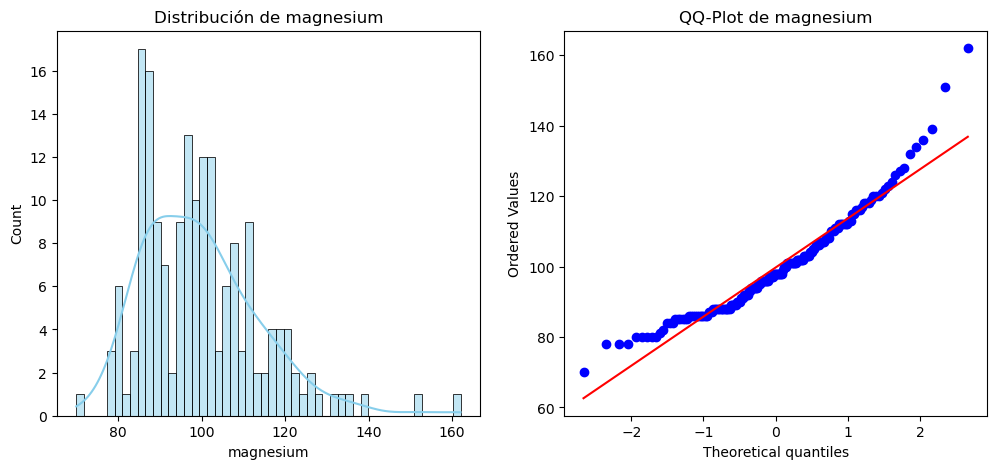

In [ ]:
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['magnesium'])
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
data = wine_df['magnesium']
column_name = 'magnesium'
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Aplicar la normalización Min-Max a los datos seleccionados.

In [ ]:
scaler = MinMaxScaler()
print(wine_df[['magnesium']])
wine_df['magnesium_MaxMinSacaler'] = datos_normalizados = scaler.fit_transform(wine_df[['magnesium']])

print(wine_df['magnesium_MaxMinSacaler'])

     magnesium
0        127.0
1        100.0
2        101.0
3        113.0
4        118.0
..         ...
173       95.0
174      102.0
175      120.0
176      120.0
177       96.0

[178 rows x 1 columns]
0      0.619565
1      0.326087
2      0.336957
3      0.467391
4      0.521739
         ...   
173    0.271739
174    0.347826
175    0.543478
176    0.543478
177    0.282609
Name: magnesium_MaxMinSacaler, Length: 178, dtype: float64


### Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

Shapiro-Wilk Test: p-valor = 0.00000


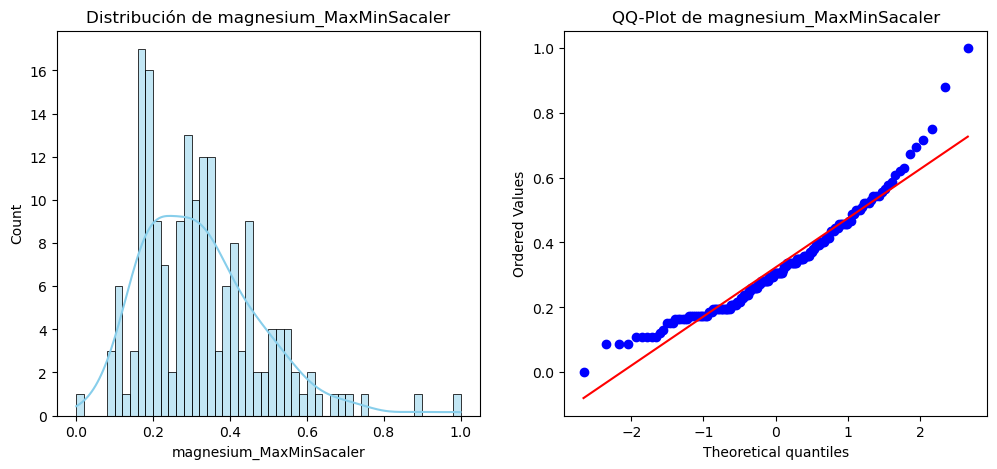

In [ ]:
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['magnesium_MaxMinSacaler'])  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
data = wine_df['magnesium_MaxMinSacaler']
column_name = 'magnesium_MaxMinSacaler'
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

Text(0.5, 1.0, 'Distribución de magnesium')

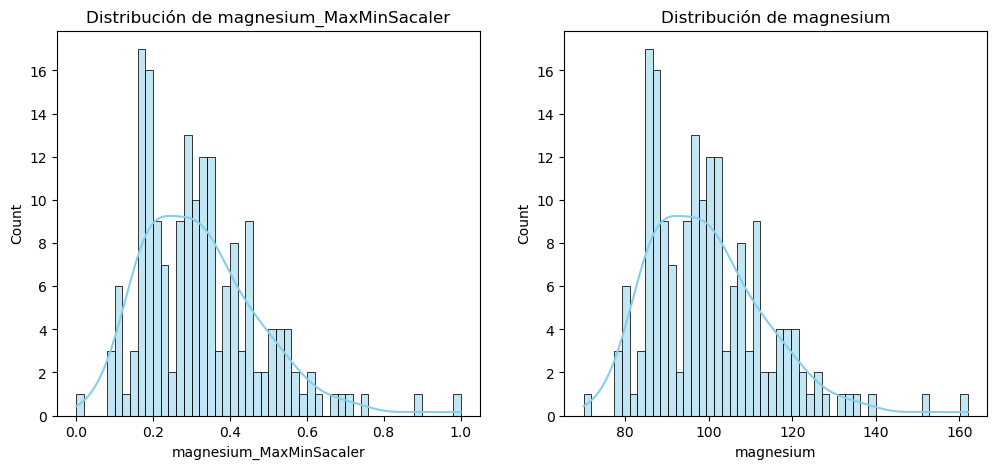

In [ ]:
data = wine_df['magnesium_MaxMinSacaler']
column_name = 'magnesium_MaxMinSacaler'
plt.figure(figsize=(12, 5))

# Histograma MaxMin
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

data = wine_df['magnesium']
column_name = 'magnesium'

# Histograma Original
plt.subplot(1, 2, 2)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

### Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?

La distribucion de los datos se mantuvo.

2. ¿Qué interpretas del p-valor antes y después de la normalización?

Como la distribucion de los datos se mantuvo, el p-value quedo igual.


## Ejercicio 2: Normalización Z-Score
### Aplicar la normalización Z-Score a los datos seleccionados.

In [ ]:
from scipy.stats import zscore
wine_df['magnesium_zscore'] = zscore(wine_df['magnesium'])

print(wine_df['magnesium_zscore'])


0      1.913905
1      0.018145
2      0.088358
3      0.930918
4      1.281985
         ...   
173   -0.332922
174    0.158572
175    1.422412
176    1.422412
177   -0.262708
Name: magnesium_zscore, Length: 178, dtype: float64


### Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

Shapiro-Wilk Test: p-valor = 0.00000


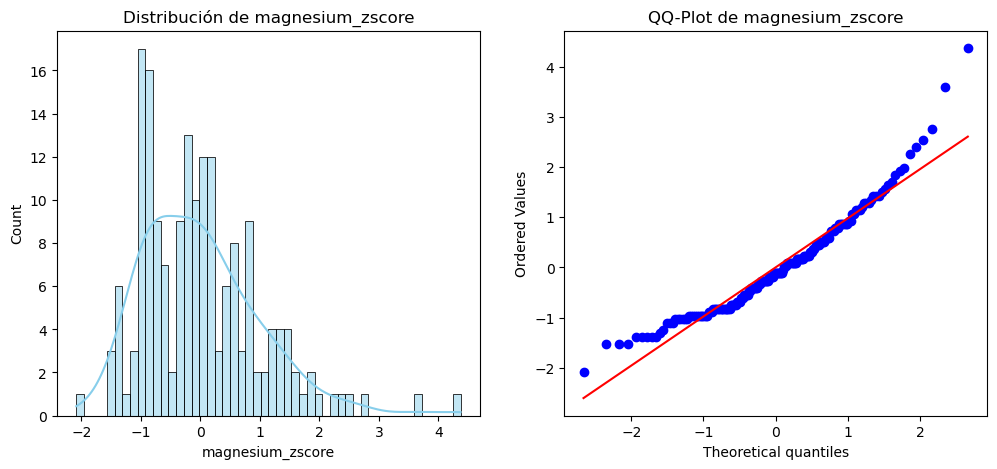

In [ ]:
data = wine_df['magnesium_zscore']
column_name = 'magnesium_zscore'
## Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(data)  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Graficar los datos originales y los normalizados utilizando matplotlib o seaborn

Text(0.5, 1.0, 'Distribución de magnesium')

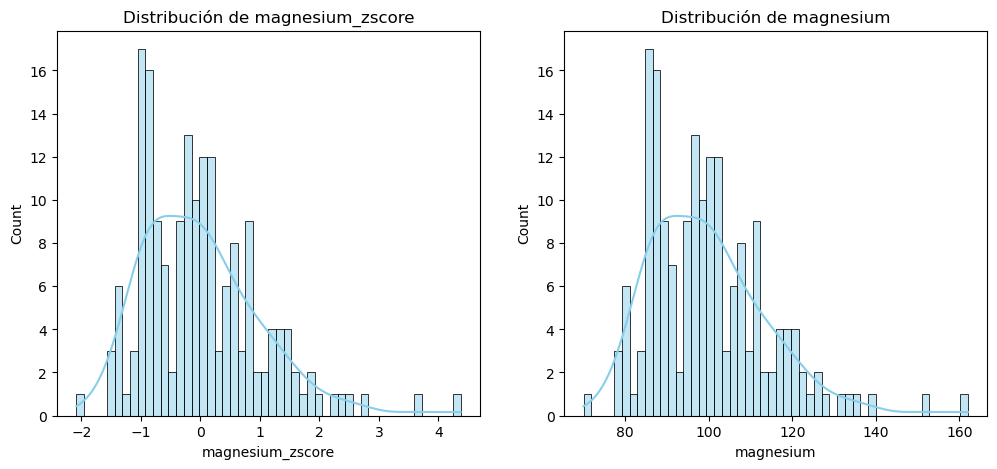

In [ ]:
data = wine_df['magnesium_zscore']
column_name = 'magnesium_zscore'
plt.figure(figsize=(12, 5))

# Histograma Z-scaler
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

data = wine_df['magnesium']
column_name = 'magnesium'

# Histograma Original
plt.subplot(1, 2, 2)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

### Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Zscaler a la distribución de los datos?

La distribucion de los datos se mantuvo, solo los rangos de valores fue modificada.  

2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

Los datos estan en un rango diferente que esta relacionado a la media y la desviacion estandard.


## Ejercicio 3: Transformación Logarítmica Instrucciones

### Cargar un conjunto de datos aleatorios generados con numpy.

In [ ]:
# Crear un vector de 5 enteros aleatorios entre 1 y 10
data_orig = np.random.randint(1, 10000, size=200)
print(data)

[9202 2780 3958 9832 4304 3145 1520 8349 6069 9125 3197 2684 6283 8708
 8083 2642 9491 4672 7751 9345 7723 1230 5881 7281 1738 7444 9779 8547
 9674 4829 9935 6740 9004 7392 7053 4863 1785 2988 7960 8386 3026 3349
 6746 4890 8629 7646 3674 9687 5849 2543 6888 1221 2416  113   11 1428
 1680 7525 5615 3332 8699 9765 6134 8540 6555 3949 6395 5535 3152 5927
 9306 9782 6175 6769 5839 9610 3124 8352 5356 9477 3067 6185 8089 2708
 2668 4760 2183 7805 8662 8046 4844 2878 3508 8345 3037 6182 7503 3013
 5769 3098 1223 5726 1607 9948 7171 4934 3731  838 3220 8053 6647 6103
 5922 7549 6133 7711 6506 5564 8064 9054 1057 9201 6112 2911 3437 7362
 9255 7120 5555 1697 4215 3100 9755  303 8249 9729 3708 1112 5581 1740
 7332  584 9746 5045 5550 6600 8240 3593 2624 9414 3850 9492  340 6161
 3437 6274 9030 2502  549 2275  428 5683 3177 7678  890  998 5180 9825
 1760 2991 2948 5593 8079 4461 9257  170 6110 8714 5864 7723  356 6640
 9759 9217  515 4208 4527 7211 6591 9584 2103 8325 5731 8641 9360 6939
 3738 

### Aplicar una transformación logarítmica (np.log) a los datos

In [ ]:
data_log = np.log(data_orig)
print(data_log)

[8.47678778 8.64312075 7.65396918 8.5872788  7.35051617 8.7388957
 7.48885296 8.8019209  8.94910547 8.02747653 8.41913925 8.63657495
 6.4035742  7.27447956 7.90544165 8.48611524 7.75018416 8.60575337
 8.74925684 9.11129322 8.8638986  9.02328764 8.44333134 8.86347431
 6.9902565  9.0351533  8.46674165 9.03360319 8.97512424 8.29953457
 7.62266395 7.8458075  8.47073032 6.98100574 8.21635833 8.278936
 6.97821374 8.47093981 7.8018004  8.05642677 8.02158453 6.41181827
 6.453625   7.34277919 8.98356523 7.83913165 8.59858883 8.04334217
 9.05578961 9.02123586 8.2448594  8.47240501 8.34853783 8.98193299
 8.3673001  9.06230429 8.00101996 8.7560526  8.24407127 8.39072253
 8.11222796 8.20658361 8.60776489 7.63143166 7.90728361 9.09346942
 8.02812906 8.54208091 8.07775756 7.97796809 6.84800527 8.96673898
 9.14899674 9.18060255 7.83755436 8.95247597 9.00233171 8.47156801
 8.21473583 8.94428932 7.15226886 8.29179711 8.63781663 8.50633445
 8.82040407 6.42162227 8.90720619 8.34402957 6.10702289 8.7225800

### Realizar una prueba de normalidad sobre los datos originales y transformados

Shapiro-Wilk Test: p-valor = 0.00004


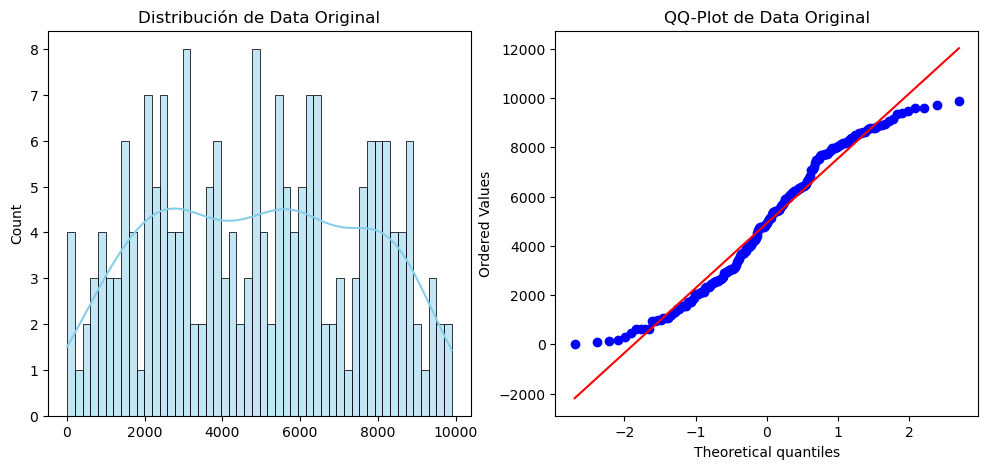

In [ ]:
## Prueba de Shapiro-Wilk
data = data_orig
column_name = 'Data Original'
shapiro_test = stats.shapiro(data)  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

Shapiro-Wilk Test: p-valor = 0.00000


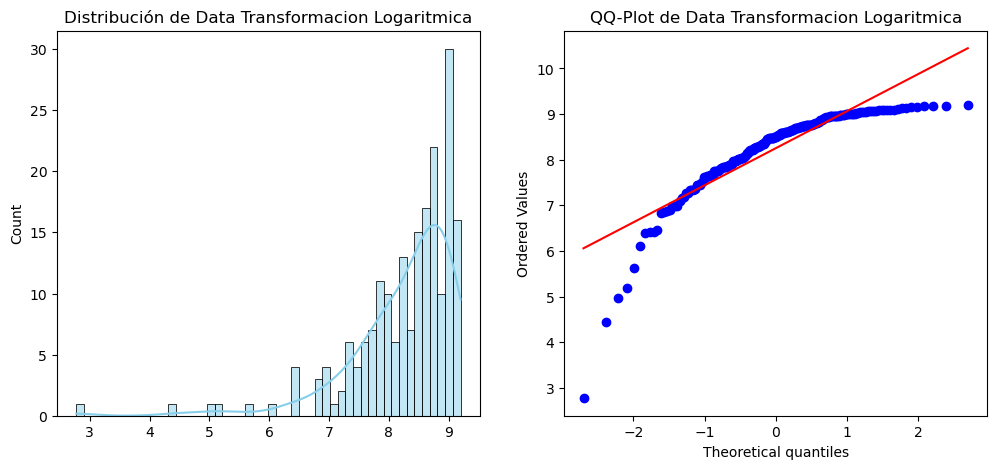

In [ ]:
## Prueba de Shapiro-Wilk
data = data_log
column_name = 'Data Transformacion Logaritmica'
shapiro_test = stats.shapiro(data)  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Graficar los datos originales y transformados utilizando matplotlib.

Text(0.5, 1.0, 'Distribución de Data transformacion logaritmica')

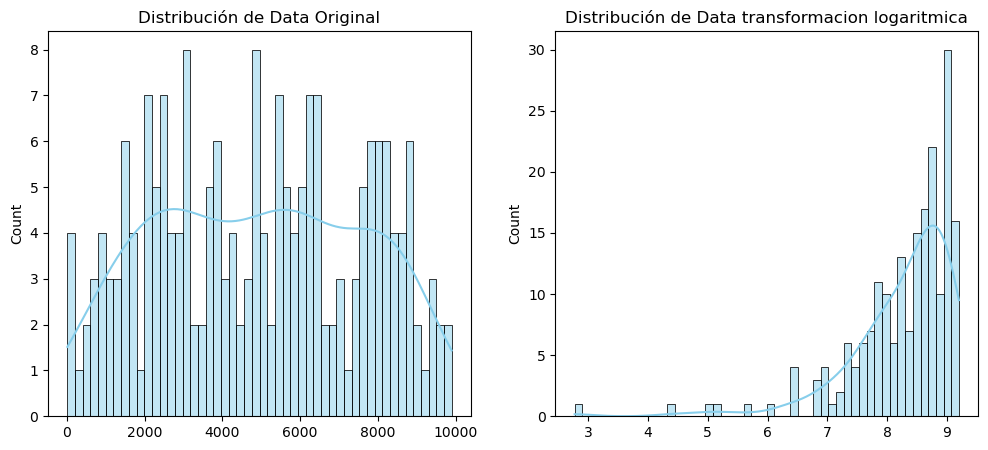

In [ ]:
data = data_orig
column_name = 'Data Original'
plt.figure(figsize=(12, 5))

# Histograma Data original
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

data = data_log
column_name = 'Data transformacion logaritmica'

# Histograma Original
plt.subplot(1, 2, 2)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

### Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?

En esta ocasión sí se nota un cambio en la distribución de los datos.

Los datos se concentran en el lado derecho de la distribución; la mayoría de los valores se posicionan en el rango de 7-9.

3. ¿Qué interpretas del p-valor antes y después de la transformación logarítmica?
Con los datos originales, el p-value era muy pequeño, pero mayor a cero. Después de la transformación logarítmica, el valor p-value se convirtió en cero. Creo que después de la conversión logarítmica los datos se alejaron de una distribución normal.

## Ejercicio 4: Transformación Raíz Cuadrada

### 	Aplicar una transformación de raíz cuadrada a los datos

In [ ]:
data_sqrt = np.sqrt(data_orig)
print(data_sqrt)

[69.29646456 75.30604225 45.92385001 73.23250644 39.45883931 79.
 42.28474902 81.5291359  87.75534172 55.35341001 67.32755751 75.05997602
 24.57641145 37.98683983 52.07686627 69.62039931 48.18713521 73.91210997
 79.41032678 95.16827202 84.09518417 91.07140056 68.14690015 84.07734534
 32.95451411 91.61331781 68.9492567  91.54233993 88.90444308 63.41923998
 45.21061822 50.54700782 69.0869018  32.80243893 60.8358447  62.76941931
 32.75667871 69.09413868 49.44694126 56.16048433 55.19057891 24.67792536
 25.19920634 39.30648801 89.28045699 50.37856687 73.64781056 55.79426494
 92.56349172 90.97801932 61.70899448 69.14477565 64.99230724 89.20762299
 65.60487787 92.86549413 54.62600113 79.68061245 61.68468205 66.3777071
 57.74945887 60.53924347 73.98648525 45.40925016 52.12485012 94.32391001
 55.3714728  71.59608928 56.76266379 54.         30.69201851 88.53247992
 96.97937925 98.52410872 50.33885179 87.90335602 90.12213934 69.11584478
 60.78651166 87.54427451 35.73513677 63.17436189 75.10659092

### Realizar una prueba de normalidad sobre los datos transformados

Shapiro-Wilk Test: p-valor = 0.00001


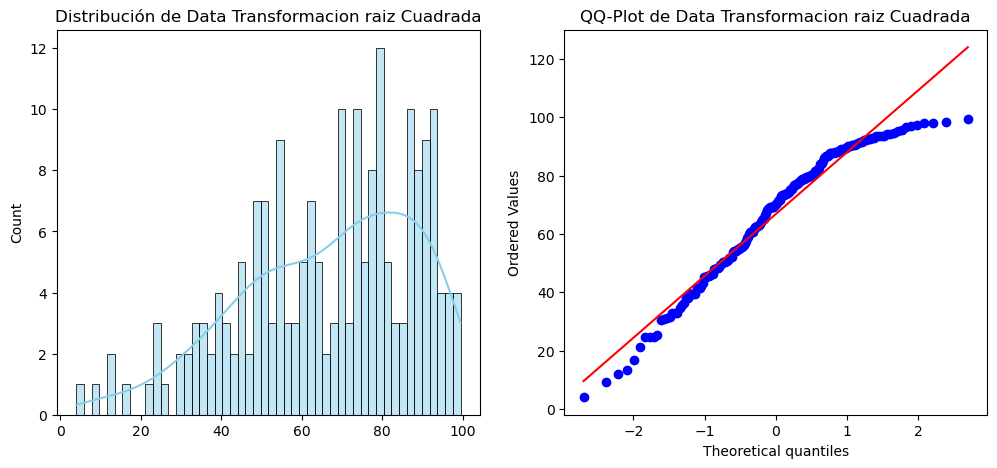

In [ ]:
## Prueba de Shapiro-Wilk
data = data_sqrt
column_name = 'Data Transformacion raiz Cuadrada'
shapiro_test = stats.shapiro(data)  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Graficar los datos originales y transformados utilizando matplotlib

Text(0.5, 1.0, 'Distribución de Data transformacion raiz cuadrada')

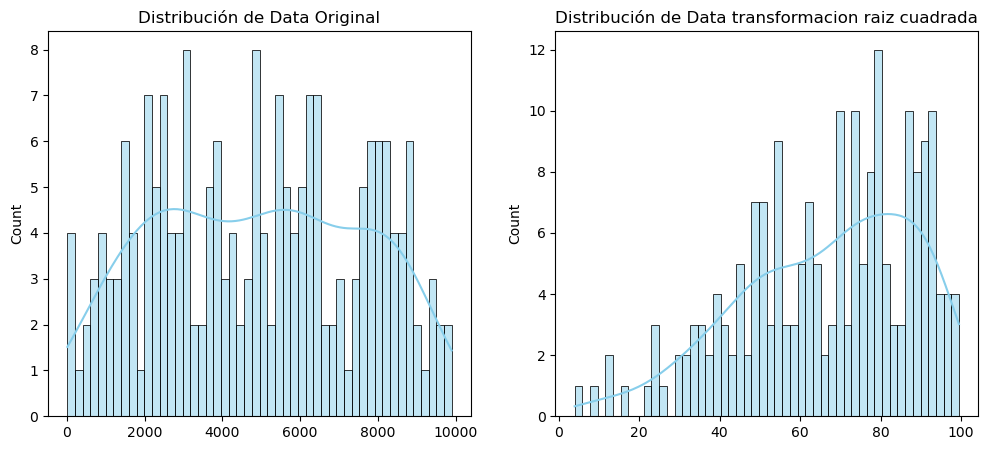

In [ ]:
data = data_orig
column_name = 'Data Original'
plt.figure(figsize=(12, 5))

# Histograma Data original
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

data = data_sqrt
column_name = 'Data transformacion raiz cuadrada'

# Histograma Transformacion raiz cuadrada
plt.subplot(1, 2, 2)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

### Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?

El rango de valores disminuyo y la distribucion se concentra en el lado derecho.

3. ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?

Parece que los valores extremos del lado derecho se juntan.

## Ejercicio 5: Transformación Box-Cox Instrucciones

### Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox

In [ ]:
transformed_data, lambda_opt = stats.boxcox(data_orig)

print(f"Mejor lambda encontrado: {lambda_opt}")

Mejor lambda encontrado: 0.7401551643337834


### Realizar una prueba de normalidad sobre los datos transformados.

Shapiro-Wilk Test: p-valor = 0.00010


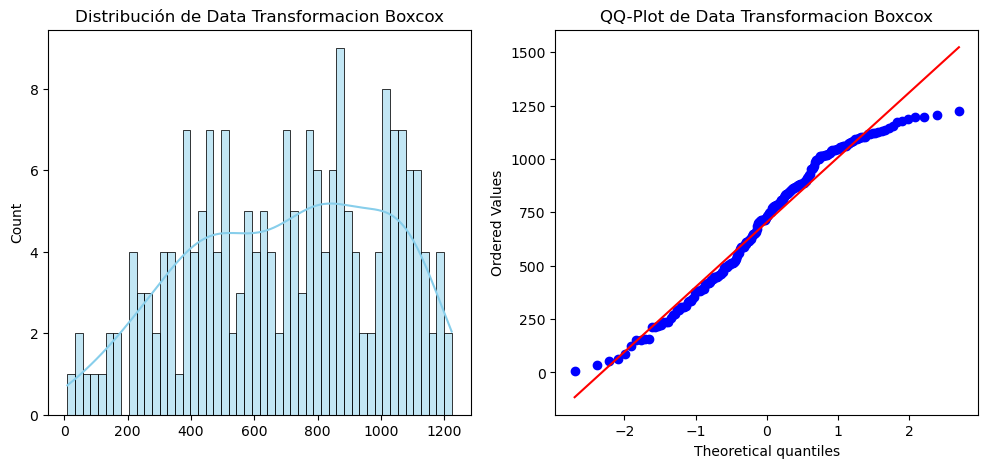

In [ ]:
## Prueba de Shapiro-Wilk
data = transformed_data
column_name = 'Data Transformacion Boxcox'
shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de {column_name}")

plt.show()

### Graficar los datos originales y transformados utilizando matplotlib

Text(0.5, 1.0, 'Distribución de Data transformacion Boxcox')

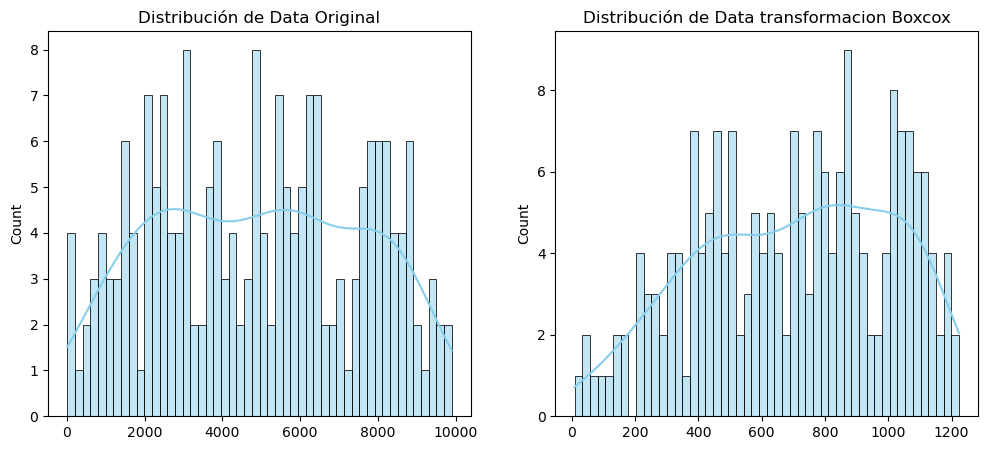

In [ ]:
data = data_orig
column_name = 'Data Original'
plt.figure(figsize=(12, 5))

# Histograma Data original
plt.subplot(1, 2, 1)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

data = transformed_data
column_name = 'Data transformacion Boxcox'

# Histograma Transformacion BoxCox
plt.subplot(1, 2, 2)
sns.histplot(data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de {column_name}")

### Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?

Al hacer esta transformacion, el p-value incremento para los datos en la prueba de normalidad.

2. ¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?

El valor lambda es el valor que encontro el algoritmo en scipy.stats que obtiene la mejor normalizacion de los datos.